# DDMI Agentic Trading

## Cell 1 
### Making sure data is correctly loaded

In [1]:
import sys 
sys.path.append('../')
from src.data_loader import download_prices

# Download fresh data
prices = download_prices()

# Display tail
prices.tail()

Saved raw prices to /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/raw/prices_yahoo.csv


Price            Close                               High              \
Ticker             QQQ        SPXL        TLT         QQQ        SPXL   
Date                                                                    
2025-11-07  609.739990  212.960007  89.570000  609.950012  213.039993   
2025-11-10  623.229980  222.660004  89.550003  624.309998  223.509995   
2025-11-11  621.570007  224.160004  89.959999  622.719971  224.830002   
2025-11-12  621.080017  224.520004  90.120003  624.859985  226.149994   
2025-11-13  608.400024  213.389999  89.379997  618.119995  222.039993   

Price                         Low                               Open  \
Ticker            TLT         QQQ        SPXL        TLT         QQQ   
Date                                                                   
2025-11-07  89.870003  598.669983  203.630005  89.360001  608.309998   
2025-11-10  89.669998  616.890015  216.759995  89.389999  618.919983   
2025-11-11  90.070000  617.520020  220.130005  89.779999  620.570007   
2025-11-12  90.320000  617.809998  222.220001  89.879997  624.840027   
2025-11-13  89.940002  606.085510  211.890106  89.379997  617.565002   

Price                                Volume                     
Ticker            SPXL        TLT       QQQ     SPXL       TLT  
Date                                                            
2025-11-07  209.990005  89.360001  81835400  6900300  28530100  
2025-11-10  218.830002  89.489998  55919900  3136600  24093500  
2025-11-11  221.300003  89.949997  44868800  4998900  18942300  
2025-11-12  226.029999  89.949997  47444400  2485100  23594900  
2025-11-13  221.770004  89.820000  69823180  5176011  33721619

## Cell 2
### Visualising loaded data for context

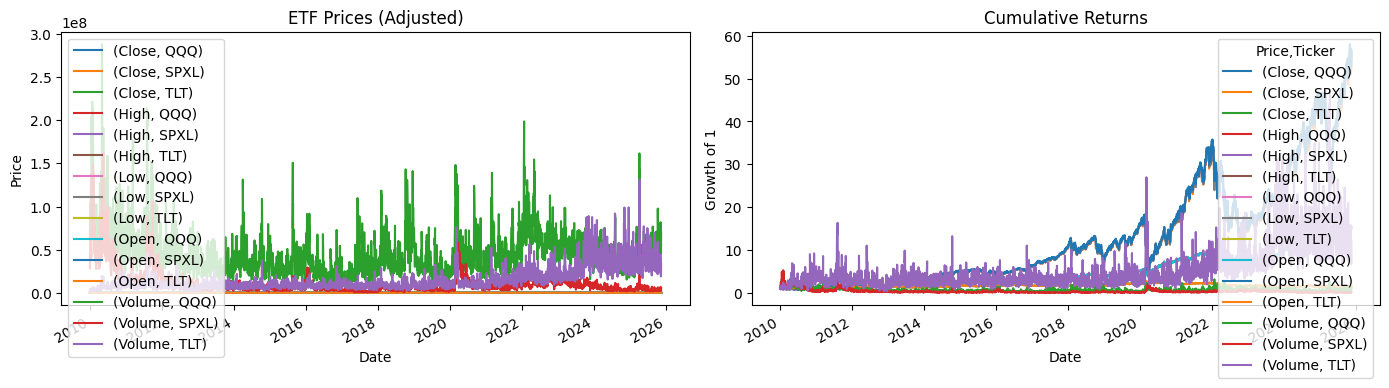

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=False)

prices.plot(ax=ax[0])
ax[0].set_title("ETF Prices (Adjusted)")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].legend(loc="upper left")

ret = prices.pct_change().dropna()
cumret = (1 + ret).cumprod()

cumret.plot(ax=ax[1])
ax[1].set_title("Cumulative Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Growth of 1")

plt.tight_layout()
plt.show()


## Cell 3
### Loading processed prices and visualising them

In [3]:
from src.data_loader import build_processed_prices

prices = build_processed_prices()
prices.head(21)


Loading existing processed prices from /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/processed/prices_daily.parquet


,date,ticker,close,high,low,open,volume,adj_close,ret_1d,log_ret_1d,ret_fwd_1d,ret_fwd_5d,vol_20d
0,2010-01-04,QQQ,40.393559,40.454474,40.263034,40.315246,62822800,40.393559,NaN,NaN,0.000000,-0.001292,NaN
3,2010-01-05,QQQ,40.393559,40.463174,40.167314,40.367454,62935600,40.393559,0.000000,0.000000,-0.006032,-0.013787,NaN
6,2010-01-06,QQQ,40.149921,40.506693,40.089009,40.376169,96033000,40.149921,-0.006032,-0.006050,0.000650,0.004552,NaN
9,2010-01-07,QQQ,40.176018,40.263037,39.958474,40.210826,77094100,40.176018,0.000650,0.000650,0.008231,0.004765,NaN
12,2010-01-08,QQQ,40.506702,40.506702,39.967194,40.089018,88886600,40.506702,0.008231,0.008197,-0.004082,-0.015038,NaN
15,2010-01-11,QQQ,40.341358,40.585006,40.132514,40.558902,104673400,40.341358,-0.004082,-0.004090,-0.012511,0.004961,NaN
18,2010-01-12,QQQ,39.836662,40.149926,39.619118,40.097718,90673900,39.836662,-0.012511,-0.012590,0.012451,0.003058,NaN
21,2010-01-13,QQQ,40.332664,40.454492,39.688736,39.958488,100661000,40.332664,0.012451,0.012374,0.000863,-0.018555,NaN
24,2010-01-14,QQQ,40.367455,40.480578,40.219526,40.254331,75209000,40.367455,0.000863,0.000862,-0.011640,-0.048070,NaN
27,2010-01-15,QQQ,39.897560,40.506684,39.723528,40.437072,126849300,39.897560,-0.011640,-0.011709,0.016140,-0.033587,NaN
